# URL that is helpful

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import zipfile as z

files = z.ZipFile("drive/MyDrive/Temp/data.zip",'r')
files.extractall()
files.close()

1. [Preprocessing Technique](https://medium.com/@datamonsters/text-preprocessing-in-python-steps-tools-and-examples-bf025f872908)
2. [Convert text into features](https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/)
3. [Using word embedding](https://towardsdatascience.com/word-embeddings-exploration-explanation-and-exploitation-with-code-in-python-5dac99d5d795)

# Download all the dependencies

In [3]:
import nltk

# Start Coding

In [4]:
import os
import glob
import numpy as np
import email

In [5]:
path = 'data/'

In [6]:
easy_ham_paths = glob.glob(path+'easy_ham/*')
easy_ham_2_paths = glob.glob(path+'easy_ham_2/*')
hard_ham_paths = glob.glob(path+'hard_ham/*')
spam_paths = glob.glob(path+'spam/*')
spam_2_paths = glob.glob(path+'spam_2/*')

In [7]:
def get_email_content(email_path):
    file = open(email_path,encoding='latin1')
    try:
        msg = email.message_from_file(file)
        for part in msg.walk():
            if part.get_content_type() == 'text/plain':
                return part.get_payload() # prints the raw text
    except Exception as e:
        print(e)
        
        
def get_email_content_bulk(email_paths):
    email_contents = [get_email_content(o) for o in email_paths]
    return email_contents

# Split data into train/test

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
ham_path = [
    easy_ham_paths,
    easy_ham_2_paths,
    hard_ham_paths
]

spam_path = [
    spam_paths,
    spam_2_paths
]

In [10]:
ham_sample = np.array([train_test_split(o) for o in ham_path])

<ipython-input-10-4eb9ce232b77>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ham_sample = np.array([train_test_split(o) for o in ham_path])


In [11]:
ham_train = np.array([])
ham_test = np.array([])
for o in ham_sample:
    ham_train = np.concatenate((ham_train,o[0]),axis=0)
    ham_test = np.concatenate((ham_test,o[1]),axis=0)

In [12]:
ham_train.shape, ham_test.shape

((3938,), (1315,))

In [13]:
spam_sample = np.array([train_test_split(o) for o in spam_path])

<ipython-input-13-760e87a3aeb2>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  spam_sample = np.array([train_test_split(o) for o in spam_path])


In [14]:
spam_train = np.array([])
spam_test = np.array([])
for o in spam_sample:
    spam_train = np.concatenate((spam_train,o[0]),axis=0)
    spam_test = np.concatenate((spam_test,o[1]),axis=0)

In [15]:
spam_train.shape, spam_test.shape

((1422,), (476,))

In [16]:
ham_train_label = [0]*ham_train.shape[0]
spam_train_label = [1]*spam_train.shape[0]
x_train = np.concatenate((ham_train,spam_train))
y_train = np.concatenate((ham_train_label,spam_train_label))

In [17]:
ham_test_label = [0]*ham_test.shape[0]
spam_test_label = [1]*spam_test.shape[0]
x_test = np.concatenate((ham_test,spam_test))
y_test = np.concatenate((ham_test_label,spam_test_label))

In [18]:
train_shuffle_index = np.random.permutation(np.arange(0,x_train.shape[0]))
test_shuffle_index = np.random.permutation(np.arange(0,x_test.shape[0]))

In [19]:
x_train = x_train[train_shuffle_index]
y_train = y_train[train_shuffle_index]

In [20]:
x_test = x_test[test_shuffle_index]
y_test = y_test[test_shuffle_index]

In [21]:
x_train = get_email_content_bulk(x_train)
x_test = get_email_content_bulk(x_test)

In [22]:
def remove_null(datas,labels):
    not_null_idx = [i for i,o in enumerate(datas) if o is not None]
    return np.array(datas)[not_null_idx],np.array(labels)[not_null_idx]

In [23]:
x_train,y_train = remove_null(x_train,y_train)
x_test,y_test = remove_null(x_test,y_test)

# Preprocessing

## Process sentence

In [24]:
import re
import string
from nltk.tokenize import word_tokenize

In [25]:
def remove_hyperlink(word):
    return  re.sub(r"http\S+", "", word)

In [26]:
def to_lower(word):
    result = word.lower()
    return result

In [27]:
def remove_number(word):
    result = re.sub(r'\d+', '', word)
    return result

In [28]:
def remove_punctuation(word):
    result = word.translate(str.maketrans(dict.fromkeys(string.punctuation)))
    return result

In [29]:
def remove_whitespace(word):
    result = word.strip()
    return result

In [30]:
def replace_newline(word):
    return word.replace('\n','')

In [31]:
def clean_up_pipeline(sentence):
    cleaning_utils = [remove_hyperlink,
                      replace_newline,
                      to_lower,
                      remove_number,
                      remove_punctuation,remove_whitespace]
    for o in cleaning_utils:
        sentence = o(sentence)
    return sentence

In [32]:
x_train = [clean_up_pipeline(o) for o in x_train]
x_test = [clean_up_pipeline(o) for o in x_test]

## Process word by word

In [33]:
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction._stop_words import ENGLISH_STOP_WORDS
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [34]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [35]:
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

In [36]:
x_train = [word_tokenize(o) for o in x_train]
x_test = [word_tokenize(o) for o in x_test]

In [37]:
def remove_stop_words(words):
    result = [i for i in words if i not in ENGLISH_STOP_WORDS]
    return result

In [38]:
def word_stemmer(words):
    return [stemmer.stem(o) for o in words]

In [39]:
def word_lemmatizer(words):
    return [lemmatizer.lemmatize(o) for o in words]

In [40]:
def clean_token_pipeline(words):
    cleaning_utils = [remove_stop_words,word_stemmer,word_lemmatizer]
    for o in cleaning_utils:
        words = o(words)
    return words

In [41]:
nltk.download('omw-1.4')
x_train = [clean_token_pipeline(o) for o in x_train]
x_test = [clean_token_pipeline(o) for o in x_test]

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


# Play around with Word2vector

In [42]:
from gensim.models import KeyedVectors

w2v = KeyedVectors.load_word2vec_format('drive/MyDrive/Temp/glove.6B.50d.word2vec.txt',binary=False)

In [43]:
w2v.most_similar('king')

[('prince', 0.8236179351806641),
 ('queen', 0.7839042544364929),
 ('ii', 0.7746230363845825),
 ('emperor', 0.7736247181892395),
 ('son', 0.766719400882721),
 ('uncle', 0.7627150416374207),
 ('kingdom', 0.7542160749435425),
 ('throne', 0.7539913654327393),
 ('brother', 0.7492411136627197),
 ('ruler', 0.7434253096580505)]

In [44]:
# King + Woman - Man = ?
w2v.most_similar(['king','woman'],negative=['man'],topn=1)

[('queen', 0.8523603677749634)]

In [45]:
w2v.doesnt_match("england china vietnam laos".split())

/usr/local/lib/python3.8/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'england'

In [46]:
w2v.doesnt_match("fish shark cat whale".split())

'cat'

# Neural Network with Glove Pretrain

In [47]:
import matplotlib.pyplot as plt
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, CuDNNGRU, Conv1D
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.models import Model
from keras import initializers, regularizers, constraints, optimizers, layers

In [48]:
maxlen = 2000
max_features = 50000

In [49]:
EMBEDDING_FILE = 'drive/MyDrive/Temp/glove.6B.50d.txt'
tokenizer = Tokenizer(num_words=max_features)

In [50]:
tokenizer.fit_on_texts(x_train)

In [51]:
x_train_features = np.array(tokenizer.texts_to_sequences(x_train))
x_test_features = np.array(tokenizer.texts_to_sequences(x_test))

x_train_features = pad_sequences(x_train_features,maxlen=maxlen)
x_test_features = pad_sequences(x_test_features,maxlen=maxlen)

<ipython-input-51-b4e0efae2a51>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_train_features = np.array(tokenizer.texts_to_sequences(x_train))
<ipython-input-51-b4e0efae2a51>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_test_features = np.array(tokenizer.texts_to_sequences(x_test))


In [52]:
def get_coefs(word,*arr): return word, np.asarray(arr, dtype='float32')
embeddings_index = dict(get_coefs(*o.split(" ")) for o in open(EMBEDDING_FILE))

all_embs = np.stack(embeddings_index.values())
emb_mean,emb_std = all_embs.mean(), all_embs.std()
embed_size = all_embs.shape[1]

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3249: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if (await self.run_code(code, result,  async_=asy)):


In [53]:
word_index = tokenizer.word_index
nb_words = min(max_features, len(word_index))
embedding_matrix = np.random.normal(emb_mean, emb_std, (nb_words, embed_size))
for word, i in word_index.items():
    if i >= max_features: continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None: embedding_matrix[i] = embedding_vector
        
inp = Input(shape=(maxlen,))
x = Embedding(max_features, embed_size, weights=[embedding_matrix])(inp)
x = Bidirectional(CuDNNGRU(64, return_sequences=True))(x)
x = GlobalMaxPool1D()(x)
x = Dense(16, activation="relu")(x)
x = Dropout(0.1)(x)
x = Dense(1, activation="sigmoid")(x)
model = Model(inputs=inp, outputs=x)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 2000)]            0         
                                                                 
 embedding (Embedding)       (None, 2000, 50)          2500000   
                                                                 
 bidirectional (Bidirectiona  (None, 2000, 128)        44544     
 l)                                                              
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 16)                2064      
                                                                 
 dropout (Dropout)           (None, 16)                0     

In [54]:
model.layers[1].trainable = False

In [55]:
history = model.fit(x_train_features,y_train, batch_size=512, epochs=20, 
          validation_data=(x_test_features, y_test))

Epoch 1/20
10/10 [==============================] - 13s 711ms/step - loss: 0.5198 - accuracy: 0.8060 - val_loss: 0.4319 - val_accuracy: 0.8413
Epoch 2/20
10/10 [==============================] - 3s 342ms/step - loss: 0.4642 - accuracy: 0.8274 - val_loss: 0.4128 - val_accuracy: 0.8413
Epoch 3/20
10/10 [==============================] - 3s 342ms/step - loss: 0.4388 - accuracy: 0.8274 - val_loss: 0.3986 - val_accuracy: 0.8413
Epoch 4/20
10/10 [==============================] - 3s 343ms/step - loss: 0.4140 - accuracy: 0.8276 - val_loss: 0.3699 - val_accuracy: 0.8413
Epoch 5/20
10/10 [==============================] - 3s 342ms/step - loss: 0.3839 - accuracy: 0.8274 - val_loss: 0.3393 - val_accuracy: 0.8413
Epoch 6/20
10/10 [==============================] - 3s 344ms/step - loss: 0.3476 - accuracy: 0.8279 - val_loss: 0.2936 - val_accuracy: 0.8453
Epoch 7/20
10/10 [==============================] - 3s 343ms/step - loss: 0.2963 - accuracy: 0.8294 - val_loss: 0.2386 - val_accuracy: 0.8453
Epoch

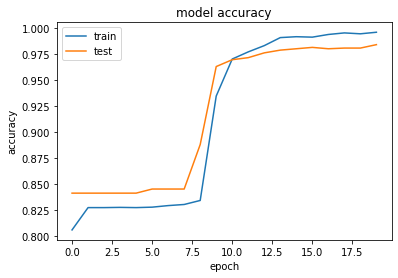

In [56]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Neural Network w Embedding From Scratch

In [57]:
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, CuDNNGRU, Conv1D
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.models import Model
from keras import initializers, regularizers, constraints, optimizers, layers
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences

In [58]:
## some config values 
embed_size = 100 # how big is each word vector
max_feature = 50000 # how many unique words to use (i.e num rows in embedding vector)
max_len = 2000 # max number of words in a question to use

In [59]:
tokenizer = Tokenizer(num_words=max_feature)

In [60]:
tokenizer.fit_on_texts(x_train)

In [61]:
x_train_features = np.array(tokenizer.texts_to_sequences(x_train))
x_test_features = np.array(tokenizer.texts_to_sequences(x_test))

<ipython-input-61-36c5aa8705fb>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_train_features = np.array(tokenizer.texts_to_sequences(x_train))
<ipython-input-61-36c5aa8705fb>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_test_features = np.array(tokenizer.texts_to_sequences(x_test))


In [62]:
x_train_features = pad_sequences(x_train_features,maxlen=max_len)
x_test_features = pad_sequences(x_test_features,maxlen=max_len)

In [63]:
embed_size = 100

inp = Input(shape=(max_len,))
x = Embedding(max_feature, embed_size)(inp)
x = Bidirectional(CuDNNGRU(64, return_sequences=True))(x)
x = GlobalMaxPool1D()(x)
x = Dense(16, activation="relu")(x)
x = Dropout(0.1)(x)
x = Dense(1, activation="sigmoid")(x)
model = Model(inputs=inp, outputs=x)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 2000)]            0         
                                                                 
 embedding_1 (Embedding)     (None, 2000, 100)         5000000   
                                                                 
 bidirectional_1 (Bidirectio  (None, 2000, 128)        63744     
 nal)                                                            
                                                                 
 global_max_pooling1d_1 (Glo  (None, 128)              0         
 balMaxPooling1D)                                                
                                                                 
 dense_2 (Dense)             (None, 16)                2064      
                                                                 
 dropout_1 (Dropout)         (None, 16)                0   

In [64]:
history = model.fit(x_train_features, y_train, batch_size=512, epochs=20, validation_data=(x_test_features, y_test))

Epoch 1/20
10/10 [==============================] - 30s 774ms/step - loss: 0.6162 - accuracy: 0.7912 - val_loss: 0.5087 - val_accuracy: 0.8413
Epoch 2/20
10/10 [==============================] - 4s 424ms/step - loss: 0.4695 - accuracy: 0.8274 - val_loss: 0.4200 - val_accuracy: 0.8413
Epoch 3/20
10/10 [==============================] - 4s 397ms/step - loss: 0.4336 - accuracy: 0.8274 - val_loss: 0.3900 - val_accuracy: 0.8413
Epoch 4/20
10/10 [==============================] - 4s 394ms/step - loss: 0.3888 - accuracy: 0.8274 - val_loss: 0.3450 - val_accuracy: 0.8413
Epoch 5/20
10/10 [==============================] - 4s 411ms/step - loss: 0.3198 - accuracy: 0.8274 - val_loss: 0.2531 - val_accuracy: 0.8413
Epoch 6/20
10/10 [==============================] - 4s 416ms/step - loss: 0.1958 - accuracy: 0.8369 - val_loss: 0.1626 - val_accuracy: 0.9487
Epoch 7/20
10/10 [==============================] - 4s 398ms/step - loss: 0.3559 - accuracy: 0.9114 - val_loss: 0.1572 - val_accuracy: 0.9697
Epoch

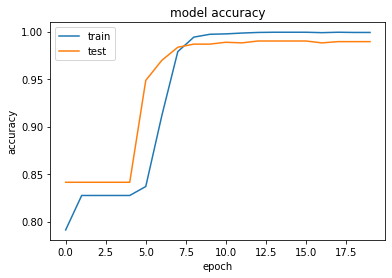

In [78]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Neural Network

In [66]:
from sklearn.metrics import confusion_matrix,f1_score, precision_score,recall_score

In [67]:
y_predict  = [1 if o>0.5 else 0 for o in model.predict(x_test_features)]

48/48 [==============================] - 3s 52ms/step


In [68]:
confusion_matrix(y_test,y_predict)

array([[1273,    5],
       [  11,  230]])

In [69]:
tn, fp, fn, tp = confusion_matrix(y_test,y_predict).ravel()

In [70]:
print("Precision: {:.2f}%".format(100 * precision_score(y_test, y_predict)))
print("Recall: {:.2f}%".format(100 * recall_score(y_test, y_predict)))

Precision: 97.87%
Recall: 95.44%


In [71]:
f1_score(y_test,y_predict)

0.9663865546218487

In [72]:
f1_score(y_test,y_predict)

0.9663865546218487

## Error Analysis

### Plot confusion matrix

In [74]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools

cnf_matrix = confusion_matrix(y_test,y_predict)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Plot normalized confusion matrix

Confusion matrix, without normalization
[[1273    5]
 [  11  230]]


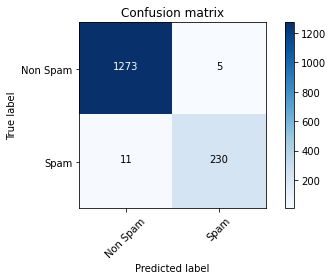

In [75]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Non Spam','Spam'], normalize=False,
                      title='Confusion matrix')